In [1]:
'''
PhD in C&T
Maximiliano E. Véliz
Pure DMA sample processing - M90E32A
Date: 28/12/2021

'\nDoctorado CyT \nMaximiliano E. Véliz\nProcesamiento muestras puras DMA - M90E36A\nFecha: 28/12/2021\n'

In [ ]:
ten=1309.5185 #(volts)

amp=130.95185 #(amps)

In [ ]:
with open("example_capture_toaster_v_i_channel.txt","r") as archivo:
    for linea in archivo:
        print(linea)

037EA7175264039EC51825E403BC2C18DC7A03D479196DFF03E8E919EB7A03FC681A699E0411571AF6250427701B87FE043C3E1C0ACC044E4B1C79EA045DD61CDAEA046A581D26930472611D51CA0476B81D67D00479D61D7B68047CA51D8D69047EF31D9B2E0481041DA8880482E51DB53F0484491DBDC00485401DC2C904860E1DC81904863F1DC8BE0485621DC0460484B11DBE450481A61DA8AE0472121D254104530A1C3B080431771B65FC0416B51ACA8E03FEB61A306E03E5BF198D1503CC9B18EC2C03B250183ED70395C41782350377F816C0F90359E115FED1033BD9153D2F031D901477B602FEB013AE0C02DEBC12DF8A02BA4211EAA8028F4610C5860262E70FA4960239120E9969020F3A0D854C01E33F0C617E01B58D0B341A01861609FA2701546D08B0FA0121C207630100F15A062C6700C3D70509E70094AD03CEDA00614302748E002CF7011F72FFFB93FFE191FFCC8BFEADD9FF9CB7FD711FFF6BFAFC34F8FF3D4EFB0CC6FF118DF9F41AFEE7F4F8E78BFEC019F7E633FE9886F6E280FE6FBBF5D514FE45A8F4C059FE1B12F3A94DFDF1FAF2A002FDCCD7F1B64FFDAAEFF0DE4CFD8880EFF7DCFD64B2EF0988FD421DEE2C2CFD20AFED52EEFCFEACEC7072FCDE44EBA019FCC27FEAF420FCA9F1EA58C5FC9048E9AD6BFC71EEE8DA67FC4FEBE7F3ABFC300BE72A3CFC16

In [ ]:
hexa=[]
i=0
while i<len(linea):
  hexa.append(linea[i:i+6])
  i=i+6

In [ ]:
hexa[0]

'037EA7'

In [ ]:
hexa1=[]
hexa2=[]

for i in range(0,len(hexa)-1):
  if i%2==0:
    hexa1.append(hexa[i])
  else:
    hexa2.append(hexa[i])

In [ ]:
print(hexa[0])
print(hexa[1])

037EA7
175264


CANAL 1

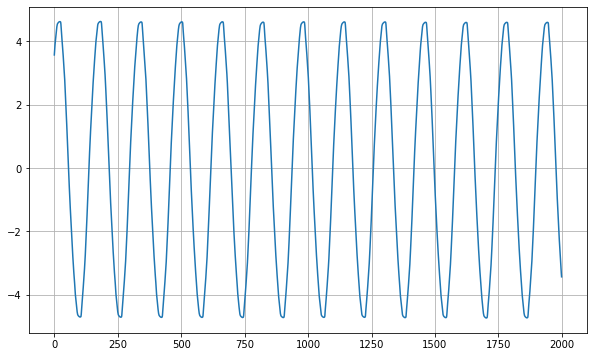

In [ ]:
resultado=[]
j=0
while j<len(hexa1):      #test with the first two elements of the array.
  my_hexdata = hexa1[j]

  scale = 16 ## equals to hexadecimal

  num_of_bits = 24

  binario=bin(int(my_hexdata, scale))[2:].zfill(num_of_bits)

  y=int(binario,2)

  if y>>23>0:   # is negative
    complemento=[]
    for i in binario:
      if i=='1':
        i=0
        complemento.append(i)
      if i=='0':
        i=1
        complemento.append(i)

    my_lst_str = ''.join(map(str, complemento))
    binariocomplemento=my_lst_str


    muestra=int(binariocomplemento,2)
    r=(-1)*((muestra)/(2**23))*amp     # note that the current constant is set.
    resultado.append(r)
    j=j+1   #is positive

  else:
    muestra=int(binario,2)
    r=(muestra/(2**23))*amp
    resultado.append(r)
    j=j+1


a=list(range(len(resultado)))


import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.plot(a[0:2000],resultado[0:2000])

plt.grid()

plt.savefig('muestras_DMA_canal1_2.png')

plt.show()


CANAL 2

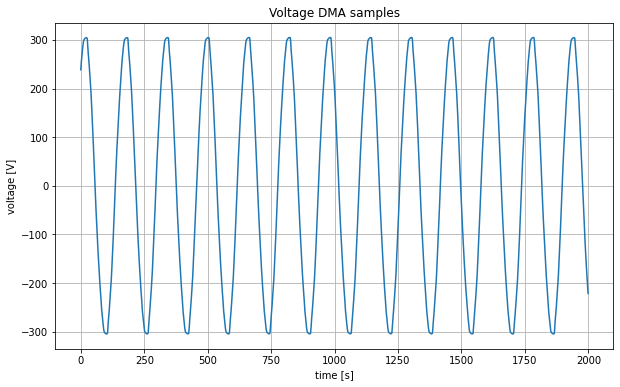

In [ ]:
resultado=[]
j=0
while j<len(hexa2):
  my_hexdata = hexa2[j]

  scale = 16 ## equals to hexadecimal

  num_of_bits = 24

  binario=bin(int(my_hexdata, scale))[2:].zfill(num_of_bits)

  y=int(binario,2)

  if y>>23>0:  # is negative
    complemento=[]
    for i in binario:
      if i=='1':
        i=0
        complemento.append(i)
      if i=='0':
        i=1
        complemento.append(i)

    my_lst_str = ''.join(map(str, complemento))
    binariocomplemento=my_lst_str


    muestra=int(binariocomplemento,2)
    r=(-1)*((muestra)/(2**23))*ten
    resultado.append(r)
    j=j+1  #is positive

  else:
    muestra=int(binario,2)
    r=(muestra/(2**23))*ten
    resultado.append(r)
    j=j+1  #is positive


a=list(range(len(resultado)))


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(a[0:2000],resultado[0:2000],label='voltaje')

plt.title('Voltage DMA samples')
plt.xlabel('time [s]')
plt.ylabel('voltage [V]')
plt.grid()


plt.savefig('muestras_DMA_canal2_2.png')

plt.show()
